# Assignment 2.
#### Assylnur_Lesken_BD-2008

## Part 1. KNN.

In [1]:
import pandas as pd
import numpy as np
from statistics import mode
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv', index_col='Unnamed: 0')
test = pd.read_csv('test.csv', index_col='Unnamed: 0')
y = pd.read_csv('train_answers.csv', index_col='Unnamed: 0')
answers = pd.read_csv('real_answers_for_test.csv', index_col='Unnamed: 0')

In [3]:
# The sizes with data.shape. 
print('Train:', train.shape)
print('Test:', test.shape)
print('Y:', y.shape)
print('Answers:', answers.shape)

Train: (426, 31)
Test: (143, 31)
Y: (426, 1)
Answers: (143, 1)


In [4]:
# The sizes. 
print('Train:', train.size)
print('Test:', test.size)
print('Y:', y.size)
print('Answers:', answers.size)

Train: 13206
Test: 4433
Y: 426
Answers: 143


Look at their sizes with data.shape:<br>
Train: (426, 31); 
Test: (143, 31); 
Y: (426, 1); 
Answers: (143, 1) 
<br>
<br>
How many features we have? <br>
31 - features<br><br>
What is the sizes of train, test, y and answers?<br> 
Train: 13206; 
Test: 4433; 
Y: 426; 
Answers: 143; 

In [5]:
distLst = []
for i in range(len(train)):
#     calculate the distance
    distance = np.linalg.norm(test.iloc[0]-train.iloc[i])
    distLst.append(distance)

In [6]:
print('Minimum distance: ', min(distLst))
print('The index of the record with minimum dist: ', distLst.index(min(distLst)))
print('The label at the index: ', y.iloc[distLst.index(min(distLst))])

Minimum distance:  3.0677819598961507
The index of the record with minimum dist:  13
The label at the index:  Diagnosis    B
Name: 128, dtype: object


In [7]:
# STEP1: Calculate the distance to all train set.

all_dists=[]
for j in range(len(test)):
    distLst = []
    for i in range(len(train)):
    #     calculate the distance
        distance = np.linalg.norm(test.iloc[j]-train.iloc[i])
        distLst.append(distance)
    all_dists.append(distLst)

In [8]:
# STEP2:  Predict for all records of test

# Returns the predicted labels as a list
def knn(k):
    lst=[]
    for distLst in all_dists:
#      find the k nearest neighbor
        neighbors=np.sort(distLst)[0:k]
#      find the most frequent label
        label = mode([y.iloc[distLst.index(n)][0] for n in neighbors])
        lst.append(label)
    return lst

In [9]:
# STEP3: Calculate the accuracy.

# Returns the accuracy
def calc_acc(x):
    count=0
    for i in range(len(x)):
        if x[i][0]==answers.iloc[i][0]:
            count+=1
    return count/len(x)

In [10]:
# Calculate accuracy for each neighbors
neighbors = [1,3,5,6,7,9]
accuracy = [calc_acc(knn(i)) if i%2!=0 else (calc_acc(knn(i-1))+calc_acc(knn(i+1)))/2  for i in neighbors]

In [11]:
accuracy

[0.958041958041958,
 0.9440559440559441,
 0.9440559440559441,
 0.9475524475524475,
 0.951048951048951,
 0.958041958041958]

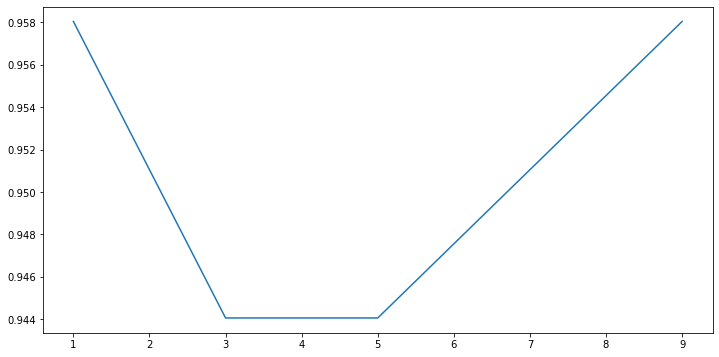

In [12]:
# STEP4: plot the graph
plt.figure(figsize=(12,6))
plt.plot(neighbors, accuracy)
plt.show()

## Part 2. K-means.

In [13]:
from scipy.io import loadmat
import os

# Load the example
data = loadmat('ex7data2.mat')
X = data['X']
initial_centroids = np.array([[3,3], [6,2], [8,5]])

In [14]:
# STEP1: Finding the closest centroid (assign it)

# Returns the index of closest centroids for each data
def findClosestCentroids(X, centroids):
    idxlst = []
    for i in X:
        dist_lst = []
        for j in centroids:
            distance = np.linalg.norm(i-j)
            dist_lst.append(distance)       
        idxlst.append([dist_lst.index(min(dist_lst))])
    return np.array(idxlst)

In [15]:
idx = findClosestCentroids(X, initial_centroids)

print('Closest centroids for the first 3 examples:')
print(idx[:3])
print('(the closest centroids should be 0, 2, 1 respectively)')

Closest centroids for the first 3 examples:
[[0]
 [2]
 [1]]
(the closest centroids should be 0, 2, 1 respectively)


In [16]:
# STEP2: Compute the mean. (recomputing at each iteration)

# Returns the coordinates of new centroids
def computeCentroids(X, idx, K):
    cent = []
    for k in range(K):
        points = []
        for i in range(len(idx)):
            if idx[i] == k:
                points.append(X[i])
        points = np.array(points)
        x = np.mean(points[:, 0])
        y = np.mean(points[:, 1])
        cent.append([x, y])
    return np.array(cent)

In [17]:
K=3
centroids = computeCentroids(X, idx, K)
print('Centroids computed after initial finding of closest centroids:')
print(centroids)
print('\nThe centroids should be')
print('[ 2.42830111  3.15792418 ]')
print('[ 5.81350331  2.63365645 ]')
print('[ 7.11938687  3.6166844 ]')

Centroids computed after initial finding of closest centroids:
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]

The centroids should be
[ 2.42830111  3.15792418 ]
[ 5.81350331  2.63365645 ]
[ 7.11938687  3.6166844 ]


In [18]:
data = loadmat(os.path.join('ex7data2.mat'))
X = data['X']
max_iters = 10
initial_centroids = np.array([[3,3], [6,2], [8,5]])
for i in range (max_iters):
    idx = findClosestCentroids(X, centroids)
    centroids = computeCentroids(X, idx, K)

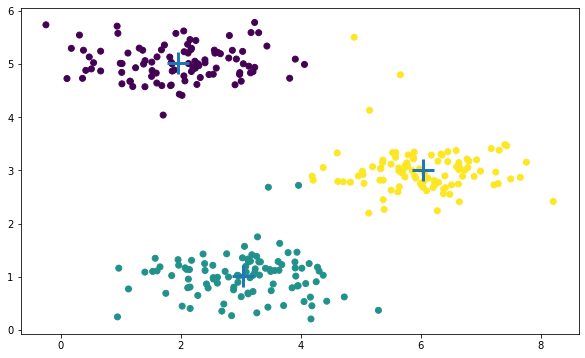

In [19]:
#let's see
fig = plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1],  c=idx)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='+', s=500, 
            linewidth=3) 
plt.show()